In [1]:
import tensorflow as tf
from ACNet import Access, Agent
from env03.main import Account

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
state_size = 58
batch_size = 50
action_size = 3


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    with tf.device("/cpu:0"):
        A = Access(state_size, batch_size, action_size)
        W = Agent('W0', A, state_size, batch_size, action_size)
        A.restore(sess,'model/saver_1.ckpt')
        W.init_network(sess)
        env = Account()
        state = env.reset()
        for _ in range(200):
            state = np.transpose(state, [1, 0, 2])
            action = W.get_deterministic_policy_action(sess, state)
            state, reward, done = env.step(action)

/home/dy/iPython/anaconda363/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


graph W0
INFO:tensorflow:Restoring parameters from model/saver_1.ckpt


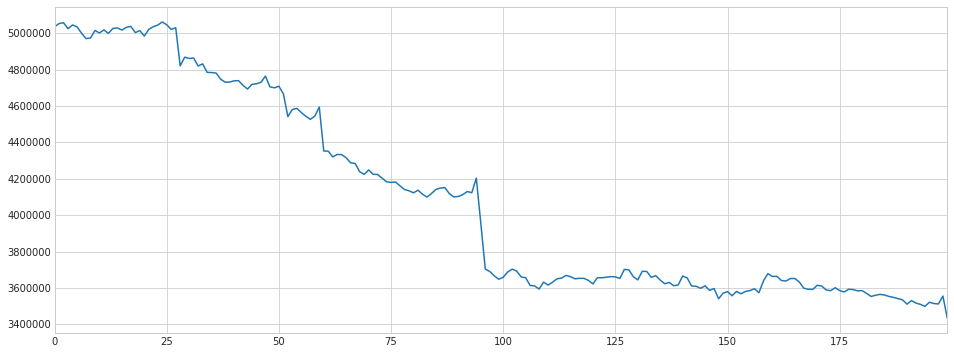

In [3]:
value, reward = env.plot_data()

pd.Series(value).plot(figsize=(16,6))

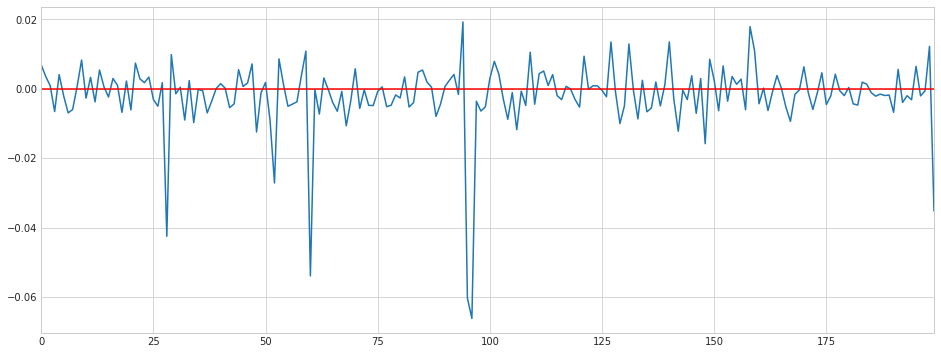

In [4]:
pd.Series(reward).plot(figsize=(16,6))
pd.Series(np.zeros_like(reward)).plot(figsize=(16,6), color='r')